# Assignment 3: Model Evaluation

## Objective
To test your understanding of various model evaluation techniques used in machine learning, including accuracy metrics, confusion matrix interpretation, ROC/AUC, and cross-validation.


## Task 1: Accuracy Metrics Calculation
Train a classification model on a dataset of your choice and calculate the following metrics on the test set:
- Accuracy
- Precision
- Recall
- F1-Score

### Question:
What are the calculated values for accuracy, precision, recall, and F1-score? What do these metrics tell you about your model's performance?


In [18]:
#importing libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Titanic dataset from seaborn
data = sns.load_dataset('titanic')

# Preprocess the dataset
data = data.drop(columns=['deck', 'embark_town', 'alive'])
data = data.dropna()

# Convert categorical variables to numeric
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
data['class'] = data['class'].map({'First': 1, 'Second': 2, 'Third': 3})
data['who'] = data['who'].map({'man': 0, 'woman': 1, 'child': 2})
data['adult_male'] = data['adult_male'].astype(int)
data['alone'] = data['alone'].astype(int)

X = data.drop(columns=['survived'])
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.7663551401869159
Precision: 0.75
Recall: 0.6847826086956522
F1-Score: 0.7159090909090909


### Analysis:
- **Accuracy** measures the overall correctness of the model by dividing the number of correct predictions by the total number of predictions.
- **Precision** measures the accuracy of the positive predictions, i.e., the number of true positives divided by the number of true positives plus false positives.
- **Recall** (or sensitivity) measures the ability of the model to find all the relevant cases within a dataset, i.e., the number of true positives divided by the number of true positives plus false negatives.
- **F1-Score** is the harmonic mean of precision and recall, providing a single metric that balances both concerns.


## Task 2: Confusion Matrix Interpretation
Create a confusion matrix for your classification model on the test set.

### Question:
Present the confusion matrix and explain what each value represents. How does the confusion matrix help in understanding the model's performance?


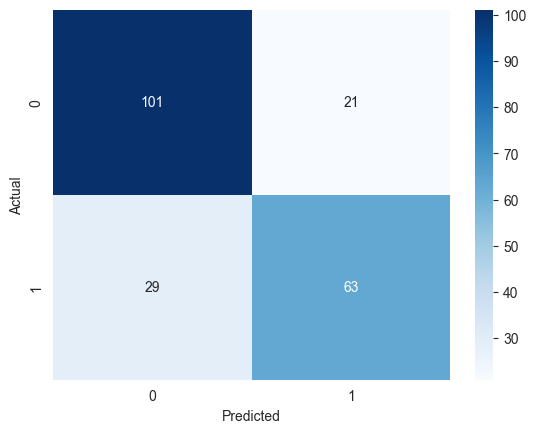

In [19]:
# Task 2: Confusion Matrix Interpretation

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Analysis:
- **True Positives (TP)**: The model correctly predicted the positive class.
- **True Negatives (TN)**: The model correctly predicted the negative class.
- **False Positives (FP)**: The model incorrectly predicted the positive class.
- **False Negatives (FN)**: The model incorrectly predicted the negative class.

The confusion matrix helps in understanding the types of errors the model is making and the overall performance across different classes.


## Task 3: ROC/AUC Calculation
Plot the ROC curve and calculate the AUC for your classification model on the test set.

### Question:
What does the ROC curve look like? What is the AUC value? How do these metrics help in evaluating your model's performance?


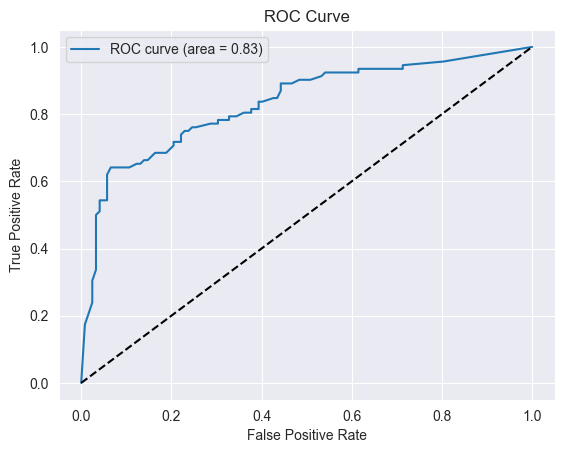

AUC: 0.8319226657163221


In [20]:
# Task 3: ROC/AUC Calculation

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_prob = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test_bin, y_pred_prob[:, 1])

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

print(f'AUC: {roc_auc}')

### Analysis:
- The **ROC curve** shows the true positive rate (sensitivity) versus the false positive rate (1-specificity) at various threshold settings.
- The **AUC (Area Under the Curve)** represents the degree of separability between classes. A higher AUC value indicates a better performing model.

The ROC curve and AUC value help in evaluating the model's ability to discriminate between positive and negative classes.

## Task 4: Cross-Validation Reporting
Perform k-fold cross-validation (e.g., k=5) for your classification model and report the mean and standard deviation of the accuracy.

### Question:
What are the mean and standard deviation of the cross-validation accuracy? Why is cross-validation important in model evaluation?


In [21]:
# Task 4: Cross-Validation Reporting

from sklearn.model_selection import cross_val_score

k = 5
scores = cross_val_score(model, X, y, cv=k)
print(f'Mean accuracy: {scores.mean()}')
print(f'Standard deviation of accuracy: {scores.std()}')

Mean accuracy: 0.7991923569388358
Standard deviation of accuracy: 0.02870427328224631


### Analysis:
- **Mean Accuracy**: The average accuracy across all k-folds.
- **Standard Deviation of Accuracy**: The variability in accuracy across the k-folds.

Cross-validation is important because it provides a more reliable estimate of model performance by averaging results over multiple folds, reducing the risk of overfitting and ensuring that the model generalizes well to unseen data.
